# Lesson 1: Loading and Analyzing Microscopy Images

In this lesson, we will:

1. Load microscopy images from different formats.
2. Explore basic properties of images, including their shape and intensity.
3. Visualize the images to understand their content.

Microscopy images are usually represented as multi-dimensional arrays where each pixel holds a value representing some characteristic (like intensity). These images may have different channels (such as DAPI and IF), and the data may come in different file formats, such as `.stk` files or `.ome.tif`.

We will work with two common formats:
- **.nd + .stk**: A pair of files, where `.nd` contains metadata and `.stk` contains the image data.
- **.ome.tif**: A file format that combines both metadata and image data.

We will use the `tifffile` library to load `.ome.tif` files and `nd2` library to load `.stk` files. Let's begin by installing the necessary libraries.


In [21]:
#bash
#!pip install tifffile matplotlib numpy

In [22]:
#### Code Section: Import Libraries

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tifffile
from nd2reader import ND2Reader
import os

## 1. Loading Image from .ome.tif File

The `.ome.tif` file is a versatile file format that contains both the image data and metadata (such as channel information, dimensions, and more). We will use the `tifffile` library to load and explore this format.

In this example, we will load a two-channel `.ome.tif` image, where one channel corresponds to the DAPI staining (for nuclei) and the other to an IF or smFISH signal.

Let's start by loading the image and visualizing it.


## 2. Exploring Image Properties

Now that we have loaded the image, let's explore some basic properties:

1. **Shape of the image**: The shape tells us how many slices, channels, and pixel dimensions the image has.
2. **Intensity**: Each pixel in an image has an intensity value. In microscopy images, these values represent the brightness at each pixel and can be used for further analysis, such as thresholding or segmentation.

### Image Shape

The shape of the image is typically represented as a tuple of dimensions. For instance, an image with the shape `(Z, C, Y, X)` would indicate:
- `Z`: the number of slices (for 3D images),
- `C`: the number of channels (e.g., DAPI and IF),
- `Y`: the height (number of rows),
- `X`: the width (number of columns).

### Intensity Analysis

Each pixel's intensity can range from 0 (black) to 255 (white) for an 8-bit image, or even higher for 16-bit or 32-bit images. We can calculate the minimum, maximum, and mean intensity values for each channel to get an overview of the image.

Let's calculate these values for both the DAPI and IF channels.



## 3. Loading Image from .stk Files

Next, we'll explore how to load images from `.stk` files, which typically accompany `.nd` metadata files. `.stk` files are often used for multi-dimensional microscopy images.

Let's load the `.stk` file and visualize it.


In [23]:
# Get the current directory where the notebook is located
notebook_dir = os.getcwd()  # Use current working directory for Jupyter notebooks

# Define the path to the 'Data' folder relative to the notebook directory
data_dir = os.path.join(notebook_dir, "..", "Data")  # '..' moves up one level from 'notebooks'

# Path to the .stk files (assuming they are separate for different channels)
stk_file_path_1 = os.path.join(data_dir, "sample2_w2conf405Virtex.stk")  # Channel 1 (e.g., DAPI)
stk_file_path_2 = os.path.join(data_dir, "sample2_w1conf561Virtex.stk")    # Channel 2 (e.g., IF/smFISH)
nd_file_path = os.path.join(data_dir, "sample2.nd")  # ND file for metadata

# Check the constructed paths (optional, for debugging purposes)
print("STK File 1 path:", stk_file_path_1)
print("STK File 2 path:", stk_file_path_2)
print("ND File path:", nd_file_path)

STK File 1 path: /Users/Ortaaure/Desktop/CodingProject/GitHubRepo/Beginner-Image-Analysis-Course-Setup-for-Biology-Students/Notebooks/../Data/sample2_w2conf405Virtex.stk
STK File 2 path: /Users/Ortaaure/Desktop/CodingProject/GitHubRepo/Beginner-Image-Analysis-Course-Setup-for-Biology-Students/Notebooks/../Data/sample2_w1conf561Virtex.stk
ND File path: /Users/Ortaaure/Desktop/CodingProject/GitHubRepo/Beginner-Image-Analysis-Course-Setup-for-Biology-Students/Notebooks/../Data/sample2.nd


In [24]:
# Load and display both .stk files (assuming they have 2 channels)

# Read the first .stk file using tifffile
stk_image_data_1 = tifffile.imread(stk_file_path_1)

# Read the second .stk file using tifffile
stk_image_data_2 = tifffile.imread(stk_file_path_2)

# Display image shape (dimensions) of both images
print(f"STK Image 1 shape (DAPI channel): {stk_image_data_1.shape}")
print(f"STK Image 2 shape (IF/smFISH channel): {stk_image_data_2.shape}")

STK Image 1 shape (DAPI channel): (21, 1200, 1200)
STK Image 2 shape (IF/smFISH channel): (21, 1200, 1200)


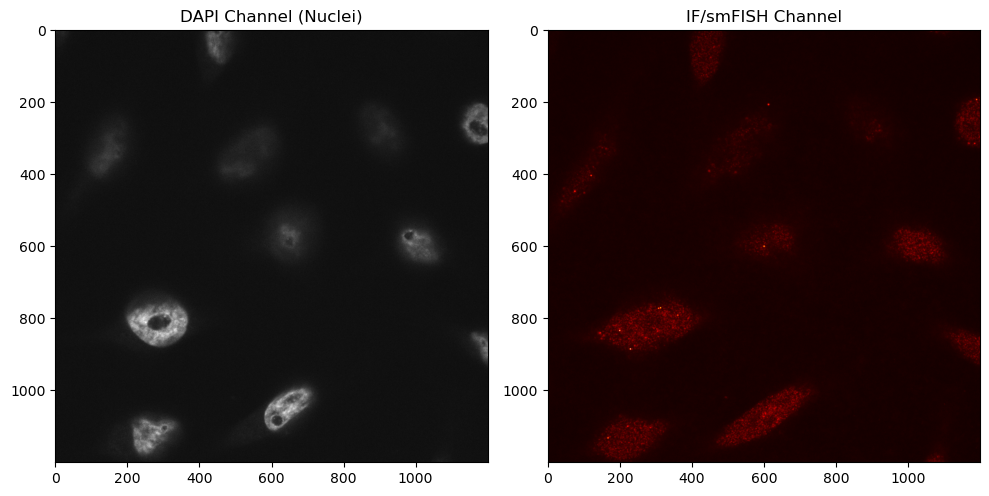

In [25]:
# Visualize the first slice (Z=0) and both channels

# Select the first slice (Z=0) in channel (DAPI) from the first .stk image
dapi_stk_image = stk_image_data_1[0, :, :]  # Assuming [Z, Y, X] structure

# Select the first slice (Z=0) in channel (IF/smFISH) from the second .stk image
if_stk_image = stk_image_data_2[0, :, :]  # Assuming [Z, Y, X] structure

# Plot both images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(dapi_stk_image, cmap='gray')  # Display DAPI image in grayscale
axes[0].set_title('DAPI Channel (Nuclei)')

axes[1].imshow(if_stk_image, cmap='hot')  # Display IF/smFISH image with a hot colormap
axes[1].set_title('IF/smFISH Channel')

plt.tight_layout()
plt.show()

In [26]:
# Calculate intensity statistics for the DAPI and IF/smFISH channels
dapi_min = np.min(dapi_stk_image)
dapi_max = np.max(dapi_stk_image)
dapi_mean = np.mean(dapi_stk_image)

if_min = np.min(if_stk_image)
if_max = np.max(if_stk_image)
if_mean = np.mean(if_stk_image)

# Print the intensity statistics
print("DAPI Channel Intensity Statistics:")
print(f"Min: {dapi_min}, Max: {dapi_max}, Mean: {dapi_mean}")

print("\nIF/smFISH Channel Intensity Statistics:")
print(f"Min: {if_min}, Max: {if_max}, Mean: {if_mean}")

DAPI Channel Intensity Statistics:
Min: 81, Max: 408, Mean: 109.34325833333334

IF/smFISH Channel Intensity Statistics:
Min: 96, Max: 1517, Mean: 136.11730138888888
